In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import math
import joblib

In [2]:
df = pd.read_csv("train.csv")
df = df.sort_values(by=['subject#', 'test_time'])

feature_cols = [col for col in df.columns if col not in ['subject#', 'total_UPDRS']]
target_col = 'total_UPDRS'

In [3]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(df[feature_cols])
y_scaled = scaler_y.fit_transform(df[[target_col]])

joblib.dump(scaler_X, "X_scaled.save")
joblib.dump(scaler_y, "y_scaled.save")

['y_scaled.save']

In [4]:
seq_length = 10
X_sequences, y_sequences = [], []

for _, group in df.groupby('subject#'):
    X_subj = scaler_X.transform(group[feature_cols])
    y_subj = scaler_y.transform(group[[target_col]])

    for i in range(len(X_subj) - seq_length):
        X_sequences.append(X_subj[i:i+seq_length])
        y_sequences.append(y_subj[i+seq_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

In [5]:
model = Sequential([
    Input(shape=(seq_length, X_sequences.shape[2])),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

In [6]:
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_sequences, y_sequences, epochs=50, batch_size=8, validation_split=0.1)

Epoch 1/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0221 - val_loss: 0.0061
Epoch 2/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0072 - val_loss: 0.0021
Epoch 3/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0062 - val_loss: 0.0021
Epoch 4/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0054 - val_loss: 0.0031
Epoch 5/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0043 - val_loss: 0.0033
Epoch 6/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0043 - val_loss: 0.0046
Epoch 7/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 8/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 9/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0032 - val_loss: 0.0079
Epoch 10/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 11/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 12/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/st

In [7]:
model.save("lstm_model_3.keras")

In [8]:
test_df = pd.read_csv("test.csv")
test_df = test_df.sort_values(by=['subject#', 'test_time'])

In [9]:
selected_subjects = list(range(1, 43))
test_df = test_df[test_df['subject#'].isin(selected_subjects)]

In [10]:
scaler_X = joblib.load("X_scaled.save")
scaler_y = joblib.load("y_scaled.save")

In [11]:
feature_cols = [col for col in test_df.columns if col not in ['subject#', 'total_UPDRS']]
target_col = 'total_UPDRS'

In [12]:
test_df[feature_cols] = scaler_X.transform(test_df[feature_cols])

In [13]:
model = load_model("lstm_model_3.keras")


Subject 1 — MSE: 1.446
Actual vs Predicted:
  Actual: 46.635 | Predicted: 45.578
  Actual: 46.635 | Predicted: 45.599
  Actual: 46.635 | Predicted: 45.726
  Actual: 47.257 | Predicted: 45.908
  Actual: 47.257 | Predicted: 46.049
  Actual: 47.257 | Predicted: 46.303
  Actual: 47.257 | Predicted: 46.235
  Actual: 47.257 | Predicted: 46.296
  Actual: 47.970 | Predicted: 46.344
  Actual: 47.970 | Predicted: 46.467
  Actual: 47.970 | Predicted: 46.648
  Actual: 47.970 | Predicted: 46.669
  Actual: 47.970 | Predicted: 46.715
  Actual: 47.970 | Predicted: 46.898


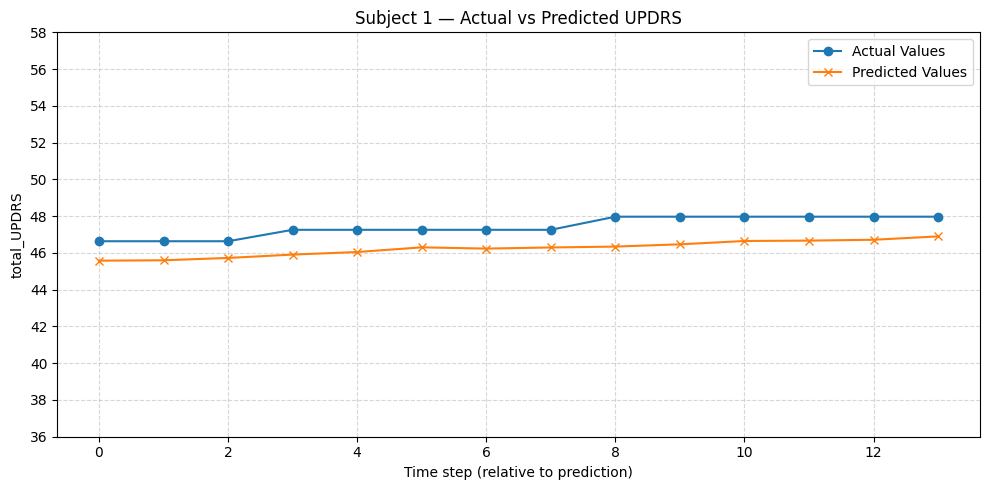


Subject 2 — MSE: 0.916
Actual vs Predicted:
  Actual: 21.067 | Predicted: 20.657
  Actual: 21.067 | Predicted: 21.003
  Actual: 21.067 | Predicted: 20.494
  Actual: 21.067 | Predicted: 20.596
  Actual: 21.650 | Predicted: 20.349
  Actual: 21.650 | Predicted: 20.382
  Actual: 21.650 | Predicted: 20.338
  Actual: 21.650 | Predicted: 20.570
  Actual: 21.650 | Predicted: 20.507
  Actual: 21.650 | Predicted: 20.677


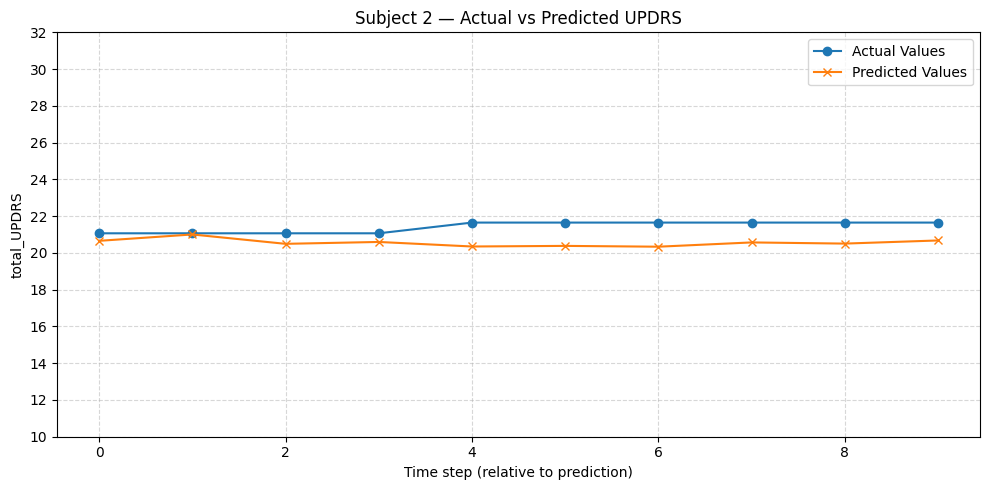


Subject 3 — MSE: 10.527
Actual vs Predicted:
  Actual: 39.441 | Predicted: 36.600
  Actual: 39.441 | Predicted: 36.579
  Actual: 39.441 | Predicted: 36.674
  Actual: 39.947 | Predicted: 36.757
  Actual: 39.947 | Predicted: 36.667
  Actual: 39.947 | Predicted: 36.520
  Actual: 39.947 | Predicted: 36.444
  Actual: 39.947 | Predicted: 36.416
  Actual: 39.947 | Predicted: 36.286


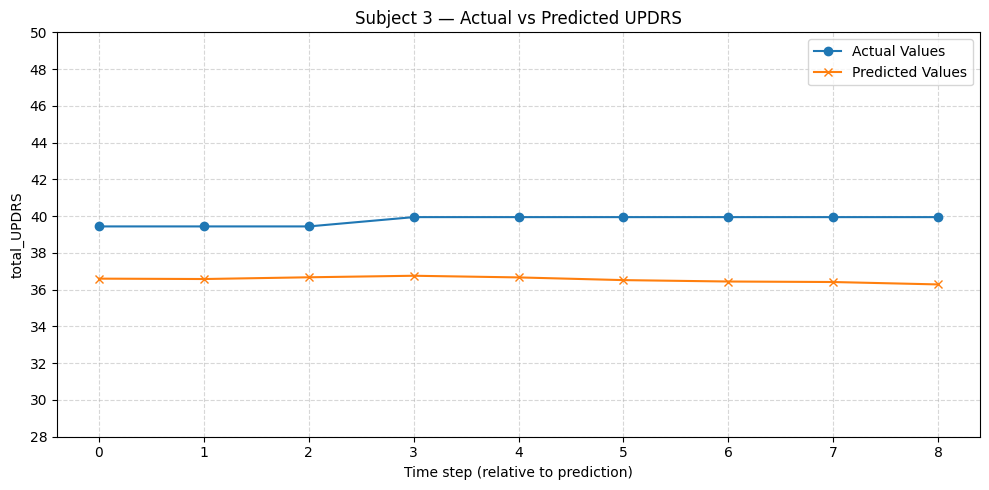


Subject 4 — MSE: 0.043
Actual vs Predicted:
  Actual: 27.630 | Predicted: 27.305
  Actual: 27.630 | Predicted: 27.290
  Actual: 27.630 | Predicted: 27.362
  Actual: 27.630 | Predicted: 27.378
  Actual: 27.630 | Predicted: 27.476
  Actual: 27.630 | Predicted: 27.553
  Actual: 27.770 | Predicted: 27.574
  Actual: 27.770 | Predicted: 27.693
  Actual: 27.770 | Predicted: 27.839
  Actual: 27.770 | Predicted: 27.986
  Actual: 27.770 | Predicted: 27.924
  Actual: 27.770 | Predicted: 27.886


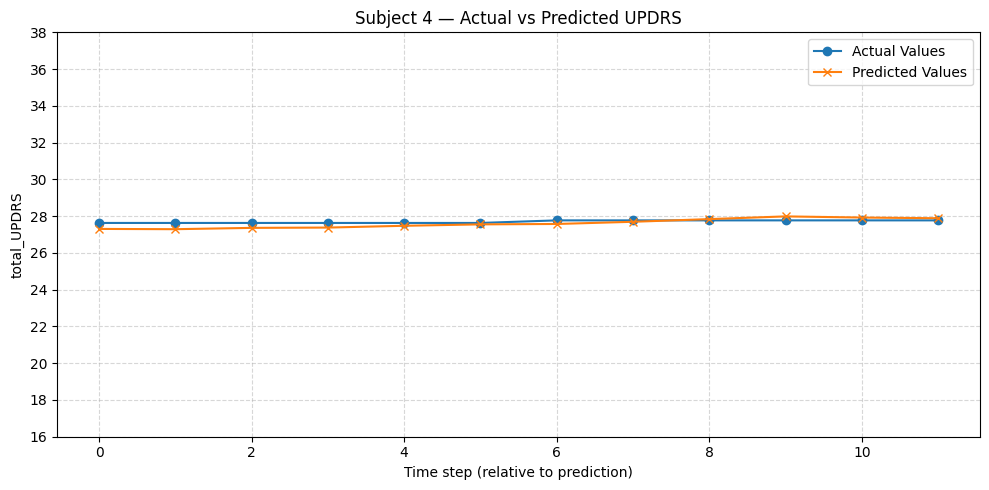


Subject 5 — MSE: 0.769
Actual vs Predicted:
  Actual: 44.000 | Predicted: 42.936
  Actual: 44.000 | Predicted: 43.038
  Actual: 44.000 | Predicted: 43.111
  Actual: 44.253 | Predicted: 43.094
  Actual: 44.253 | Predicted: 43.343
  Actual: 44.253 | Predicted: 43.377
  Actual: 44.253 | Predicted: 43.383
  Actual: 44.253 | Predicted: 43.419
  Actual: 44.253 | Predicted: 43.359
  Actual: 44.503 | Predicted: 43.482
  Actual: 44.503 | Predicted: 43.592
  Actual: 44.503 | Predicted: 43.566
  Actual: 44.503 | Predicted: 43.456
  Actual: 44.503 | Predicted: 43.671
  Actual: 44.503 | Predicted: 43.765
  Actual: 44.761 | Predicted: 43.832
  Actual: 44.761 | Predicted: 43.834
  Actual: 44.761 | Predicted: 44.001
  Actual: 44.761 | Predicted: 44.176
  Actual: 44.761 | Predicted: 44.333
  Actual: 44.761 | Predicted: 44.323


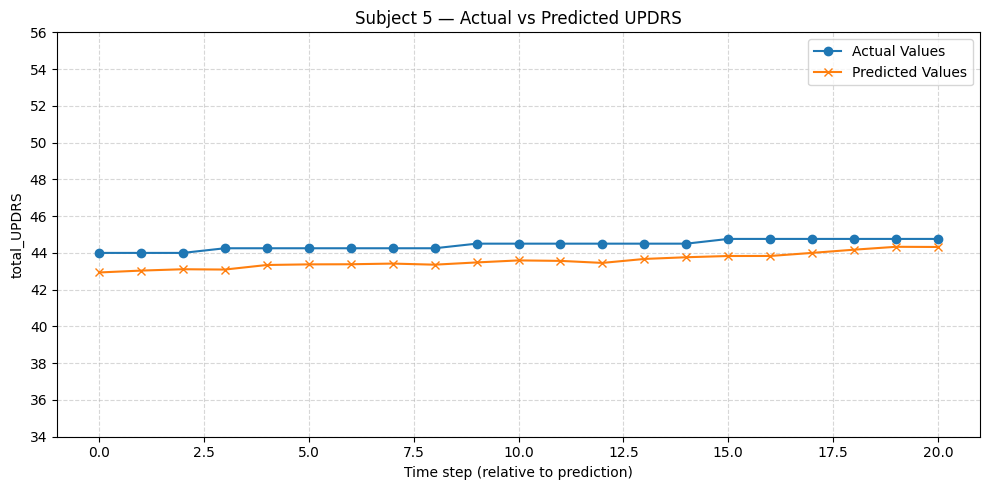


Subject 6 — MSE: 0.833
Actual vs Predicted:
  Actual: 44.556 | Predicted: 43.822
  Actual: 44.556 | Predicted: 44.406
  Actual: 44.556 | Predicted: 44.817
  Actual: 45.022 | Predicted: 45.283
  Actual: 45.022 | Predicted: 45.483
  Actual: 45.022 | Predicted: 46.113
  Actual: 45.022 | Predicted: 46.075
  Actual: 45.022 | Predicted: 46.248
  Actual: 45.022 | Predicted: 46.135
  Actual: 45.489 | Predicted: 45.955
  Actual: 45.489 | Predicted: 45.958
  Actual: 45.489 | Predicted: 45.604
  Actual: 45.489 | Predicted: 45.325
  Actual: 45.489 | Predicted: 44.826
  Actual: 45.489 | Predicted: 44.820
  Actual: 45.956 | Predicted: 44.591
  Actual: 45.956 | Predicted: 44.505
  Actual: 45.956 | Predicted: 44.293
  Actual: 45.956 | Predicted: 44.601
  Actual: 45.956 | Predicted: 45.031
  Actual: 45.956 | Predicted: 45.086


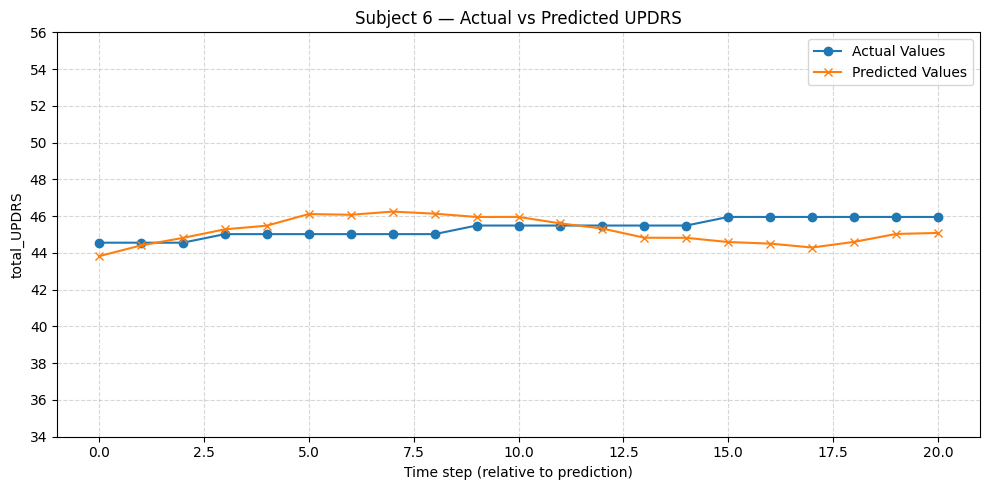


Subject 7 — MSE: 3.134
Actual vs Predicted:
  Actual: 21.077 | Predicted: 23.209
  Actual: 21.077 | Predicted: 23.101
  Actual: 20.572 | Predicted: 23.056
  Actual: 20.571 | Predicted: 22.924
  Actual: 20.571 | Predicted: 22.458
  Actual: 20.571 | Predicted: 22.406
  Actual: 20.571 | Predicted: 22.266
  Actual: 20.571 | Predicted: 22.282
  Actual: 20.062 | Predicted: 22.118
  Actual: 20.062 | Predicted: 22.121
  Actual: 20.062 | Predicted: 22.010
  Actual: 20.063 | Predicted: 21.773
  Actual: 20.063 | Predicted: 21.865
  Actual: 20.062 | Predicted: 21.794
  Actual: 19.556 | Predicted: 21.608
  Actual: 19.556 | Predicted: 21.523
  Actual: 19.556 | Predicted: 21.228
  Actual: 19.556 | Predicted: 21.010
  Actual: 19.556 | Predicted: 20.857
  Actual: 19.556 | Predicted: 20.890
  Actual: 19.050 | Predicted: 20.634
  Actual: 19.051 | Predicted: 20.490
  Actual: 19.051 | Predicted: 20.523
  Actual: 19.051 | Predicted: 20.485
  Actual: 19.051 | Predicted: 20.169
  Actual: 19.050 | Predicted: 

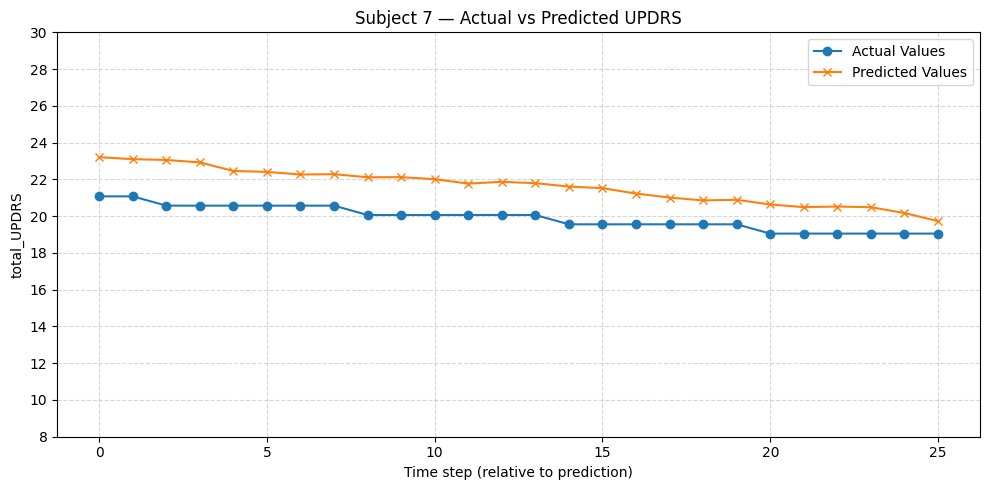


Subject 8 — MSE: 0.732
Actual vs Predicted:
  Actual: 28.411 | Predicted: 29.409
  Actual: 28.411 | Predicted: 29.567
  Actual: 28.411 | Predicted: 29.565
  Actual: 28.719 | Predicted: 29.522
  Actual: 28.719 | Predicted: 29.474
  Actual: 28.719 | Predicted: 29.332
  Actual: 28.719 | Predicted: 29.340
  Actual: 28.719 | Predicted: 29.443
  Actual: 28.719 | Predicted: 29.502
  Actual: 29.031 | Predicted: 29.662
  Actual: 29.031 | Predicted: 29.728
  Actual: 29.031 | Predicted: 29.640
  Actual: 29.031 | Predicted: 30.030
  Actual: 29.031 | Predicted: 30.123
  Actual: 29.031 | Predicted: 29.899


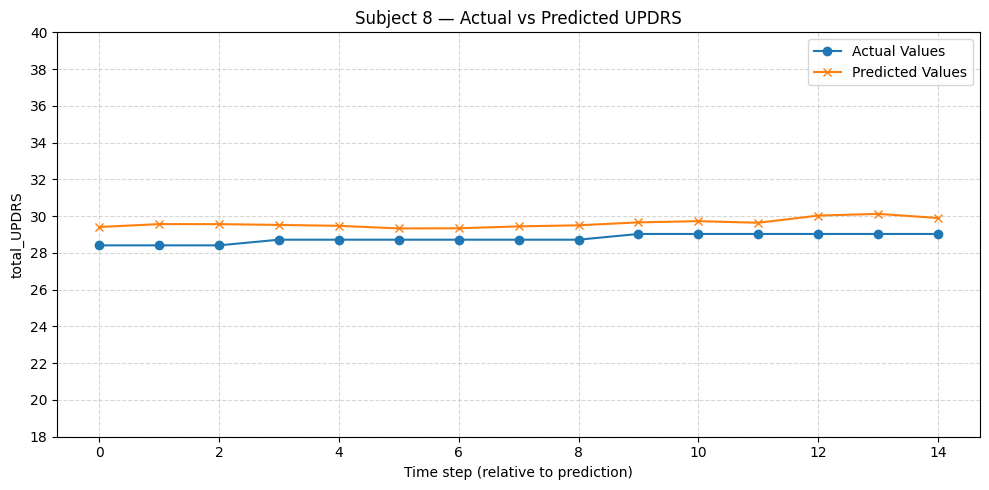


Subject 9 — MSE: 0.563
Actual vs Predicted:
  Actual: 26.643 | Predicted: 26.111
  Actual: 26.643 | Predicted: 26.091
  Actual: 26.643 | Predicted: 26.076
  Actual: 26.643 | Predicted: 25.933
  Actual: 26.643 | Predicted: 25.948
  Actual: 26.767 | Predicted: 25.994
  Actual: 26.767 | Predicted: 26.173
  Actual: 26.767 | Predicted: 26.183
  Actual: 26.767 | Predicted: 26.123
  Actual: 26.767 | Predicted: 26.062
  Actual: 26.767 | Predicted: 25.974
  Actual: 26.897 | Predicted: 26.032
  Actual: 26.897 | Predicted: 26.060
  Actual: 26.897 | Predicted: 26.063
  Actual: 26.897 | Predicted: 26.035
  Actual: 26.897 | Predicted: 25.961
  Actual: 26.897 | Predicted: 25.857


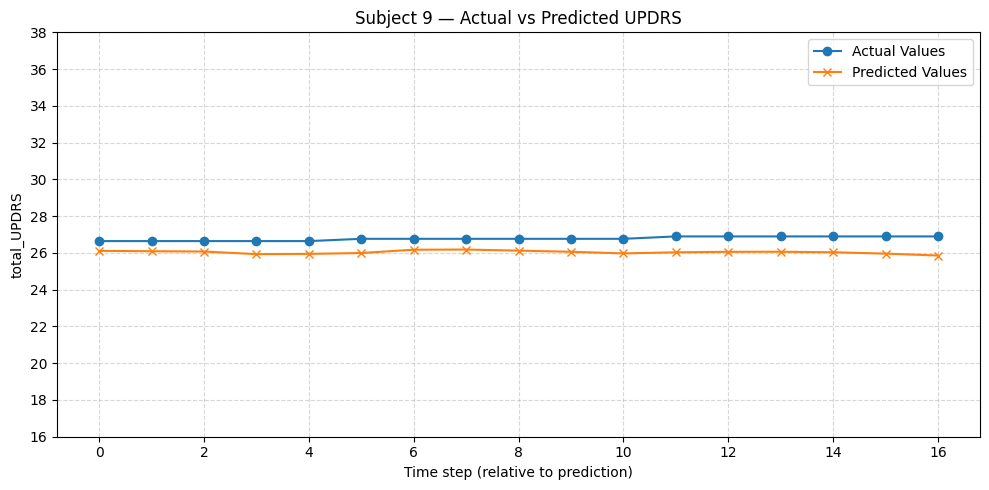


Subject 10 — MSE: 0.675
Actual vs Predicted:
  Actual: 21.489 | Predicted: 22.904
  Actual: 21.706 | Predicted: 22.491
  Actual: 21.706 | Predicted: 22.357
  Actual: 21.706 | Predicted: 22.206
  Actual: 21.706 | Predicted: 22.287
  Actual: 21.706 | Predicted: 22.613
  Actual: 21.706 | Predicted: 22.727
  Actual: 21.922 | Predicted: 22.584
  Actual: 21.922 | Predicted: 22.565
  Actual: 21.922 | Predicted: 22.689
  Actual: 21.922 | Predicted: 22.702
  Actual: 21.922 | Predicted: 22.780
  Actual: 21.922 | Predicted: 22.624


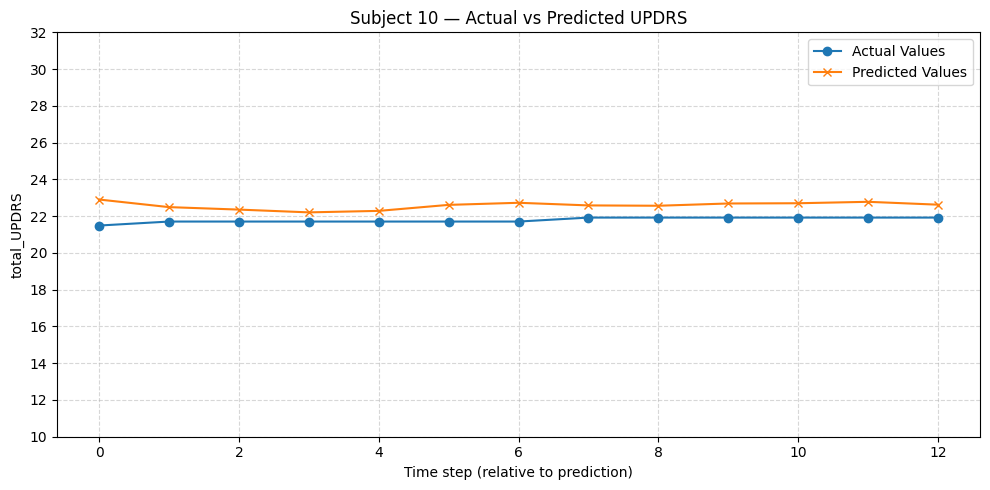


Subject 11 — MSE: 1.167
Actual vs Predicted:
  Actual: 21.170 | Predicted: 19.021
  Actual: 19.794 | Predicted: 19.090
  Actual: 19.794 | Predicted: 19.139
  Actual: 19.794 | Predicted: 19.016
  Actual: 19.794 | Predicted: 18.988
  Actual: 19.794 | Predicted: 18.626
  Actual: 19.794 | Predicted: 18.622
  Actual: 19.238 | Predicted: 18.664
  Actual: 19.237 | Predicted: 18.446
  Actual: 19.237 | Predicted: 18.216
  Actual: 19.237 | Predicted: 18.005
  Actual: 19.237 | Predicted: 18.073
  Actual: 19.237 | Predicted: 18.367


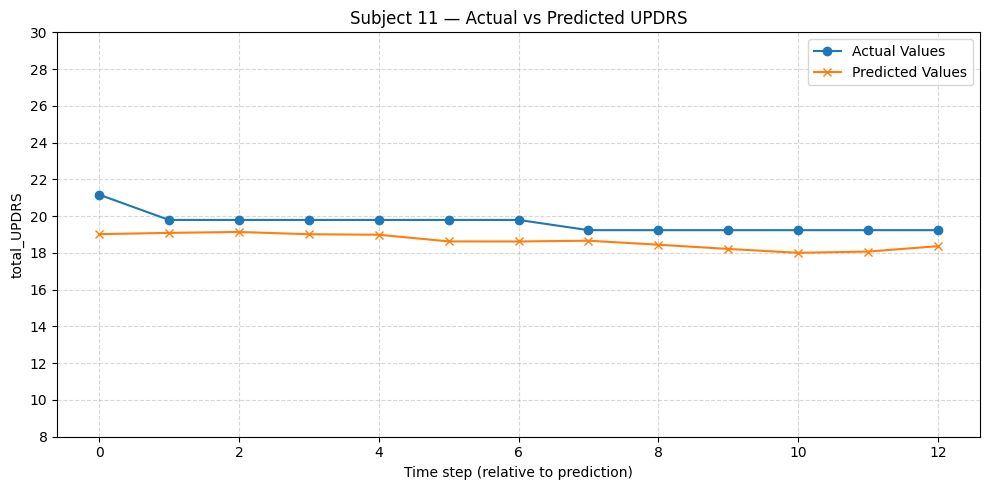

Subject 12 skipped due to insufficient data)

Subject 13 — MSE: 25.804
Actual vs Predicted:
  Actual: 35.946 | Predicted: 30.823
  Actual: 35.946 | Predicted: 30.910


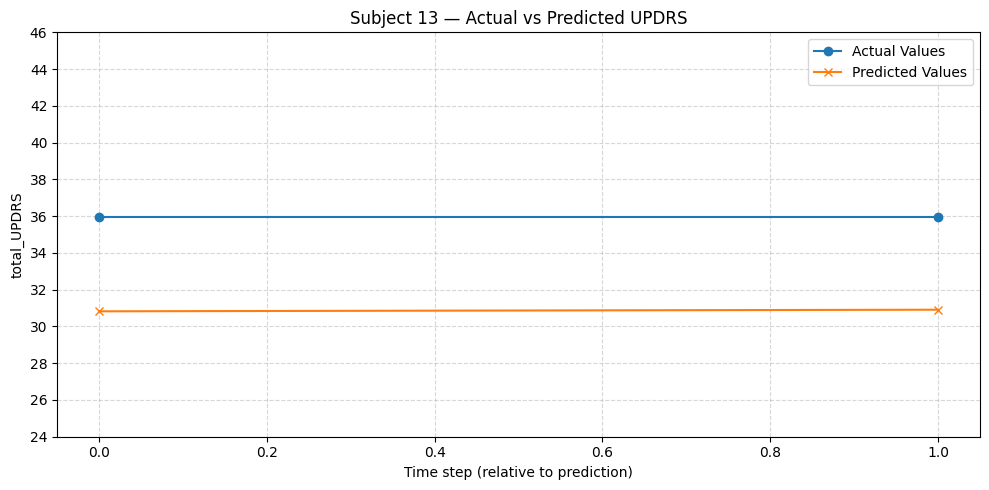


Subject 14 — MSE: 0.412
Actual vs Predicted:
  Actual: 24.804 | Predicted: 24.286
  Actual: 24.804 | Predicted: 25.821
  Actual: 24.804 | Predicted: 25.131
  Actual: 24.804 | Predicted: 25.914
  Actual: 24.803 | Predicted: 25.154
  Actual: 25.419 | Predicted: 24.948
  Actual: 25.418 | Predicted: 24.774
  Actual: 25.418 | Predicted: 24.645
  Actual: 25.419 | Predicted: 24.860
  Actual: 25.419 | Predicted: 25.509
  Actual: 25.419 | Predicted: 25.886


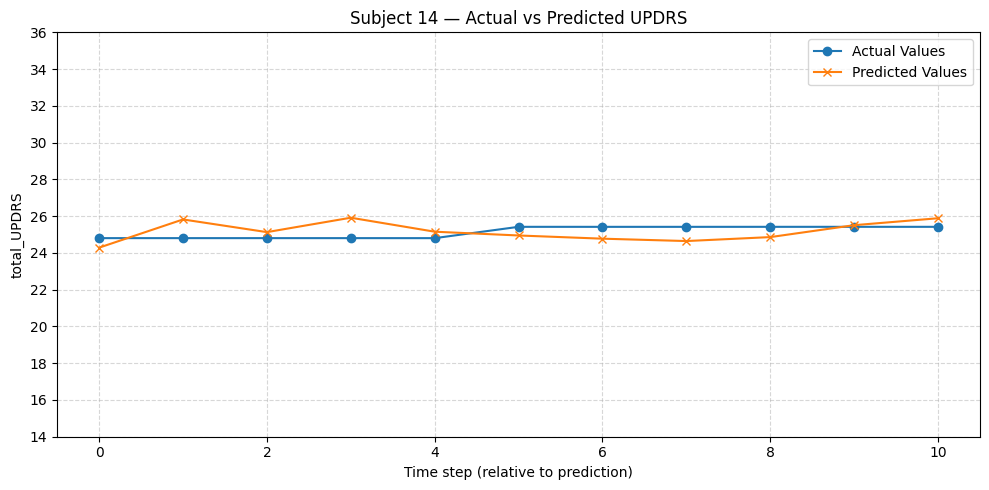


Subject 15 — MSE: 3.297
Actual vs Predicted:
  Actual: 22.957 | Predicted: 20.443
  Actual: 22.957 | Predicted: 20.437
  Actual: 23.132 | Predicted: 21.150
  Actual: 23.132 | Predicted: 21.329
  Actual: 23.132 | Predicted: 21.498
  Actual: 23.132 | Predicted: 21.841
  Actual: 23.132 | Predicted: 22.051
  Actual: 23.132 | Predicted: 22.119


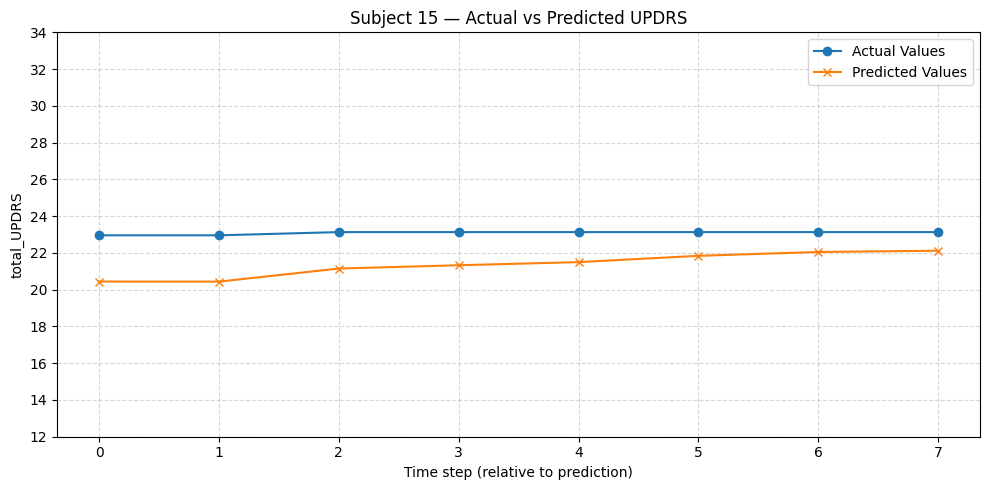


Subject 16 — MSE: 1.463
Actual vs Predicted:
  Actual: 22.182 | Predicted: 21.719
  Actual: 22.644 | Predicted: 21.812
  Actual: 22.644 | Predicted: 21.991
  Actual: 22.644 | Predicted: 21.913
  Actual: 22.644 | Predicted: 21.834
  Actual: 22.644 | Predicted: 22.008
  Actual: 22.644 | Predicted: 21.720
  Actual: 23.105 | Predicted: 21.723
  Actual: 23.105 | Predicted: 21.554
  Actual: 23.105 | Predicted: 21.524
  Actual: 23.105 | Predicted: 21.397
  Actual: 23.105 | Predicted: 21.470
  Actual: 23.105 | Predicted: 21.421


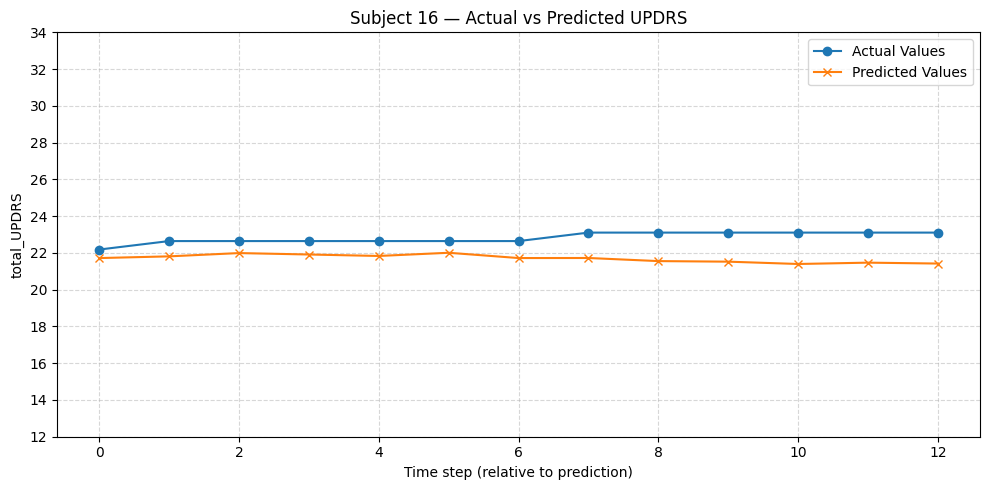


Subject 17 — MSE: 14.533
Actual vs Predicted:
  Actual: 25.905 | Predicted: 28.303
  Actual: 25.905 | Predicted: 28.393
  Actual: 25.905 | Predicted: 28.459
  Actual: 24.521 | Predicted: 28.607
  Actual: 24.522 | Predicted: 28.736
  Actual: 24.522 | Predicted: 28.884
  Actual: 24.521 | Predicted: 28.857
  Actual: 24.522 | Predicted: 28.962
  Actual: 24.521 | Predicted: 29.031


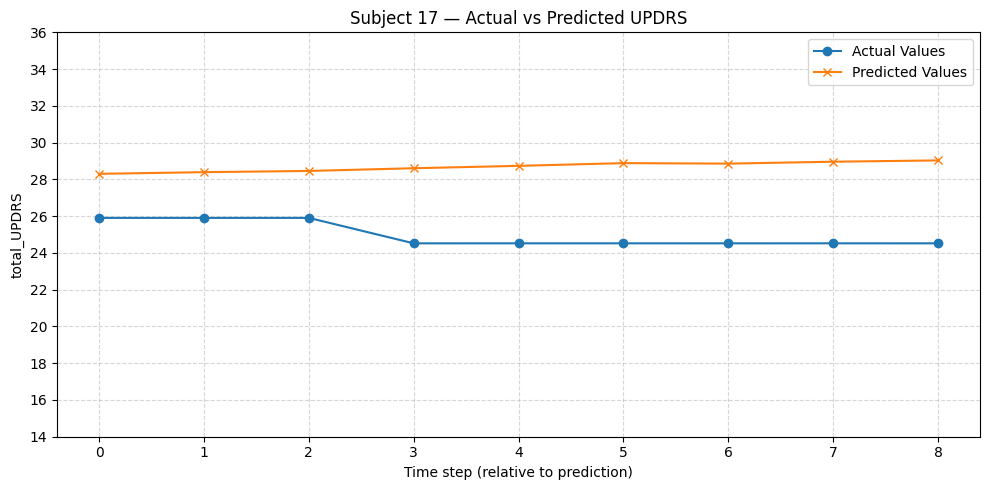


Subject 18 — MSE: 0.212
Actual vs Predicted:
  Actual: 7.000 | Predicted: 7.433
  Actual: 7.000 | Predicted: 7.268
  Actual: 7.000 | Predicted: 7.426
  Actual: 7.000 | Predicted: 7.480
  Actual: 7.000 | Predicted: 7.536
  Actual: 7.000 | Predicted: 7.561


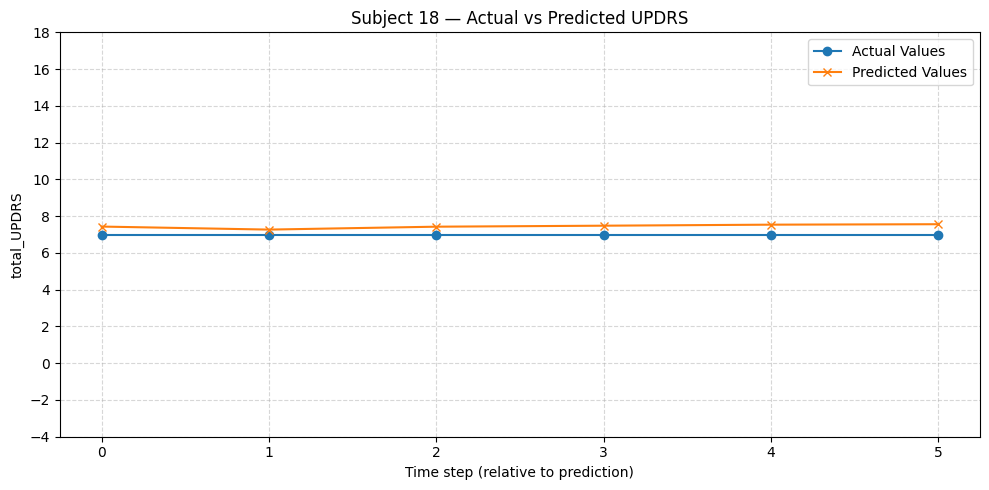


Subject 19 — MSE: 0.065
Actual vs Predicted:
  Actual: 26.103 | Predicted: 25.925
  Actual: 26.103 | Predicted: 25.823
  Actual: 26.103 | Predicted: 25.951
  Actual: 26.002 | Predicted: 26.150
  Actual: 26.002 | Predicted: 25.897
  Actual: 26.002 | Predicted: 25.914
  Actual: 26.002 | Predicted: 25.766
  Actual: 26.002 | Predicted: 25.568
  Actual: 26.002 | Predicted: 25.595


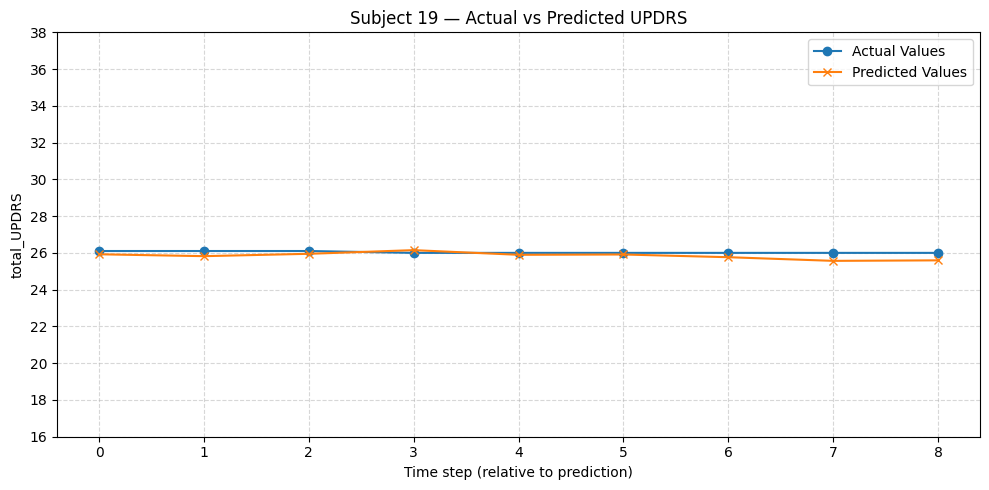


Subject 20 — MSE: 3.775
Actual vs Predicted:
  Actual: 16.891 | Predicted: 16.540
  Actual: 16.891 | Predicted: 16.824
  Actual: 16.891 | Predicted: 17.662
  Actual: 16.974 | Predicted: 18.409
  Actual: 16.974 | Predicted: 19.258
  Actual: 16.974 | Predicted: 19.355
  Actual: 16.974 | Predicted: 19.476
  Actual: 16.974 | Predicted: 19.243
  Actual: 16.974 | Predicted: 19.957


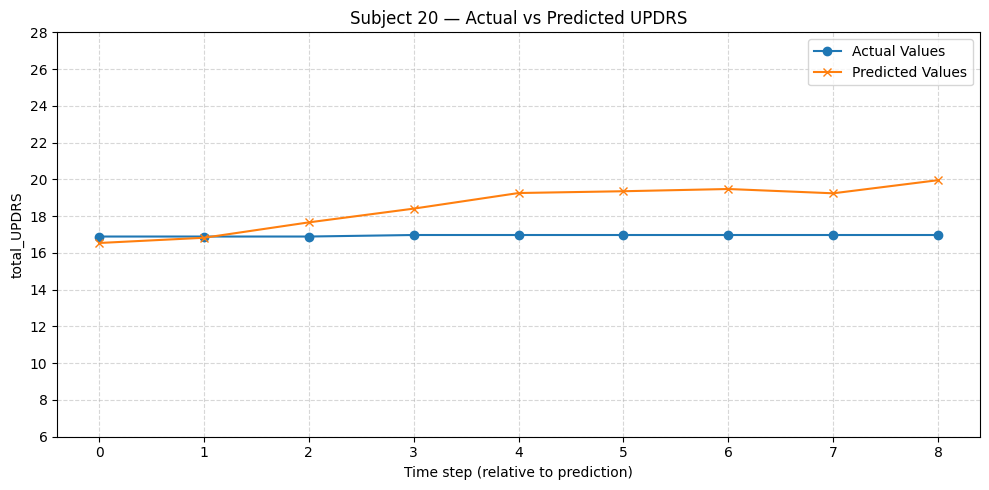


Subject 21 — MSE: 3.970
Actual vs Predicted:
  Actual: 50.418 | Predicted: 48.270
  Actual: 50.418 | Predicted: 48.383
  Actual: 50.418 | Predicted: 48.642


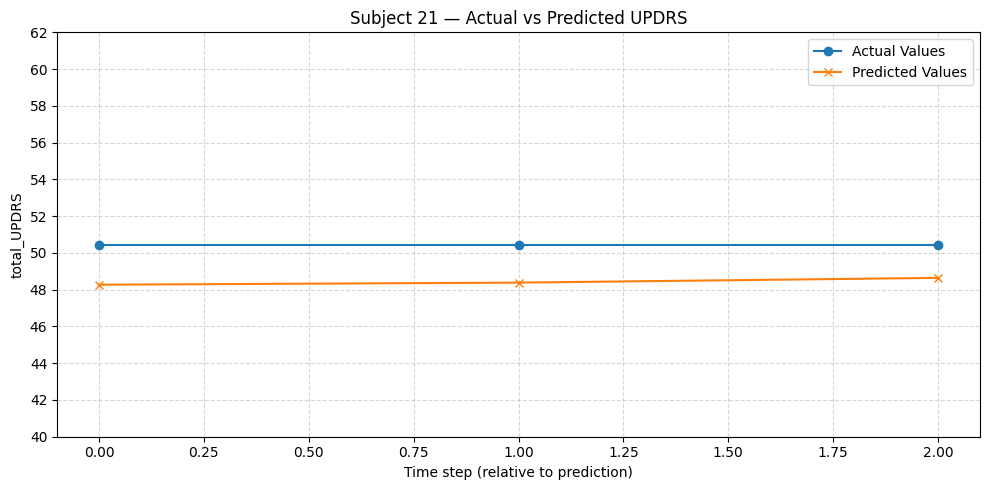


Subject 22 — MSE: 0.039
Actual vs Predicted:
  Actual: 15.320 | Predicted: 15.091
  Actual: 15.320 | Predicted: 15.160


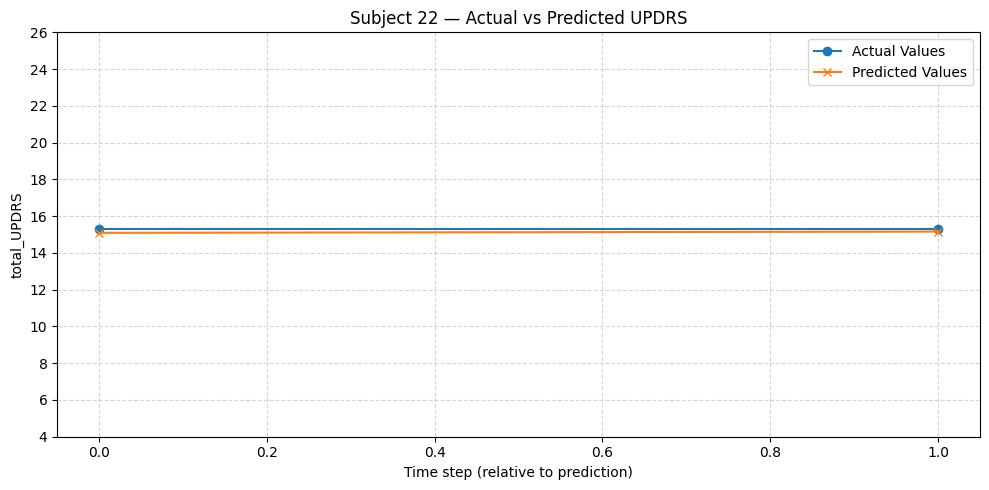


Subject 23 — MSE: 15.498
Actual vs Predicted:
  Actual: 26.442 | Predicted: 23.993
  Actual: 26.274 | Predicted: 22.668
  Actual: 26.274 | Predicted: 22.440
  Actual: 26.274 | Predicted: 21.939
  Actual: 26.274 | Predicted: 21.800
  Actual: 26.274 | Predicted: 21.555
  Actual: 26.274 | Predicted: 21.195
  Actual: 26.107 | Predicted: 20.865
  Actual: 26.107 | Predicted: 21.671
  Actual: 26.107 | Predicted: 22.298
  Actual: 26.107 | Predicted: 22.843
  Actual: 26.107 | Predicted: 23.700
  Actual: 26.107 | Predicted: 24.434


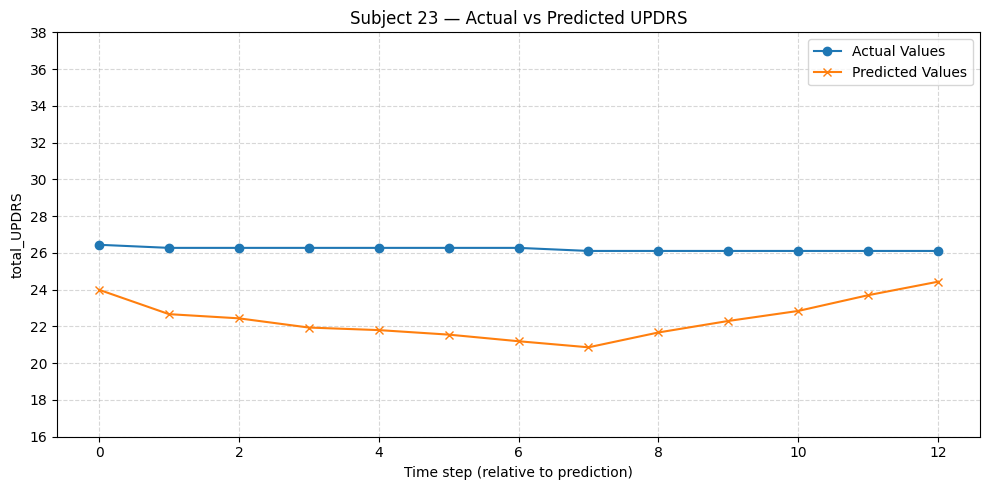


Subject 24 — MSE: 4.242
Actual vs Predicted:
  Actual: 19.723 | Predicted: 19.057
  Actual: 19.723 | Predicted: 18.699
  Actual: 19.723 | Predicted: 18.647
  Actual: 19.831 | Predicted: 18.259
  Actual: 19.831 | Predicted: 18.245
  Actual: 19.831 | Predicted: 18.169
  Actual: 19.831 | Predicted: 18.304
  Actual: 19.832 | Predicted: 18.067
  Actual: 19.832 | Predicted: 17.951
  Actual: 19.890 | Predicted: 17.835
  Actual: 19.890 | Predicted: 17.824
  Actual: 19.890 | Predicted: 17.762
  Actual: 19.890 | Predicted: 17.704
  Actual: 19.890 | Predicted: 17.563
  Actual: 19.890 | Predicted: 17.377
  Actual: 19.974 | Predicted: 17.238
  Actual: 19.974 | Predicted: 16.981
  Actual: 19.974 | Predicted: 17.175
  Actual: 19.974 | Predicted: 17.292
  Actual: 19.974 | Predicted: 17.884
  Actual: 19.974 | Predicted: 17.891


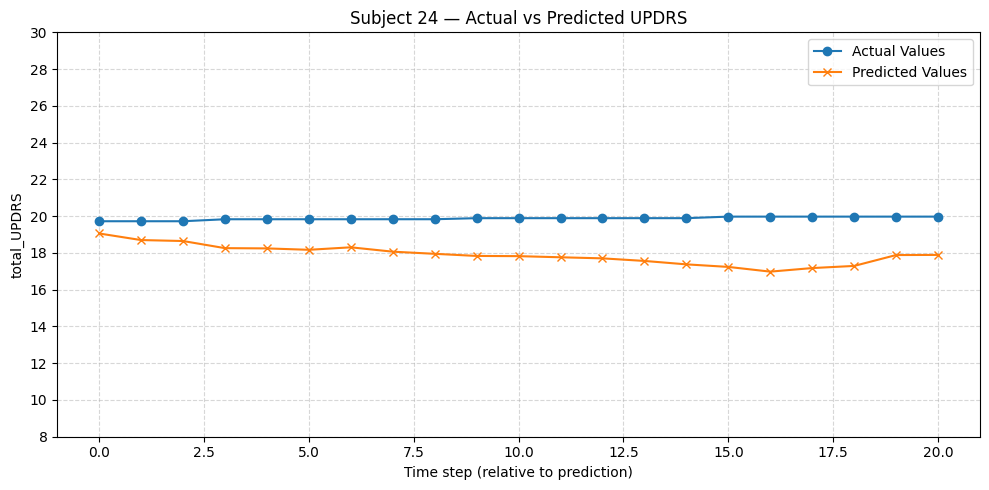


Subject 25 — MSE: 3.464
Actual vs Predicted:
  Actual: 53.569 | Predicted: 52.532
  Actual: 53.569 | Predicted: 52.627
  Actual: 53.569 | Predicted: 52.476
  Actual: 53.959 | Predicted: 52.331
  Actual: 53.960 | Predicted: 52.012
  Actual: 53.960 | Predicted: 51.778
  Actual: 53.960 | Predicted: 51.364
  Actual: 53.960 | Predicted: 51.723
  Actual: 53.960 | Predicted: 51.708


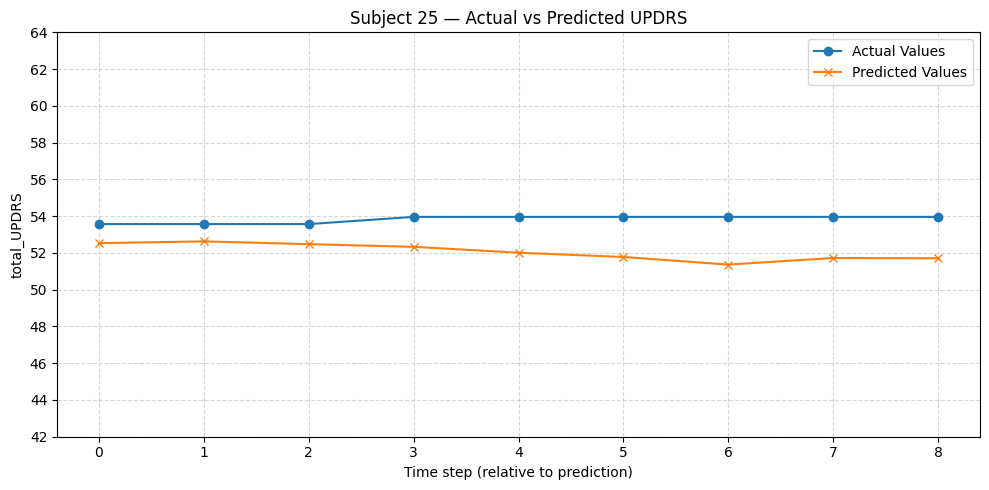


Subject 26 — MSE: 1.564
Actual vs Predicted:
  Actual: 25.011 | Predicted: 24.070
  Actual: 25.010 | Predicted: 23.872
  Actual: 25.011 | Predicted: 23.533
  Actual: 25.010 | Predicted: 23.842
  Actual: 25.010 | Predicted: 23.564


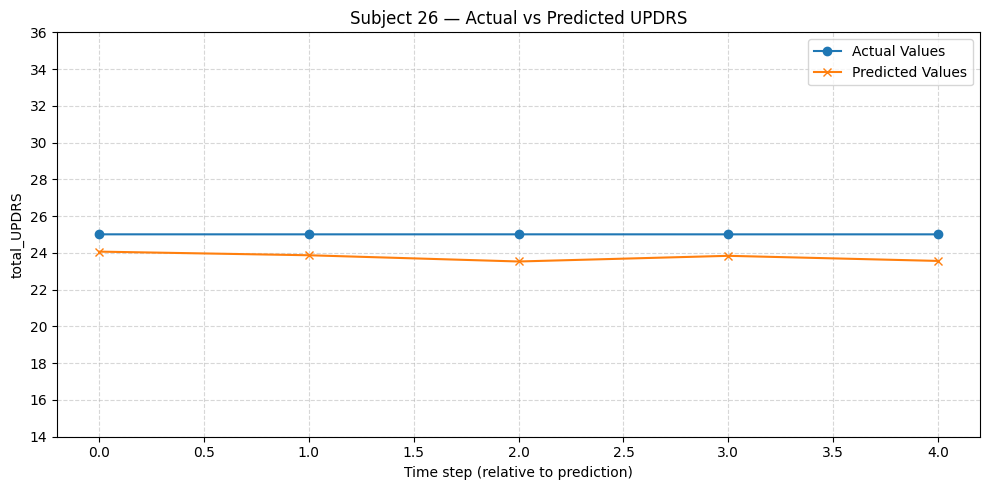


Subject 27 — MSE: 1.069
Actual vs Predicted:
  Actual: 18.698 | Predicted: 18.866
  Actual: 18.698 | Predicted: 19.507
  Actual: 18.698 | Predicted: 19.958
  Actual: 18.698 | Predicted: 19.221
  Actual: 18.698 | Predicted: 19.144
  Actual: 18.979 | Predicted: 18.269
  Actual: 18.979 | Predicted: 17.763
  Actual: 18.979 | Predicted: 17.451
  Actual: 18.979 | Predicted: 17.380


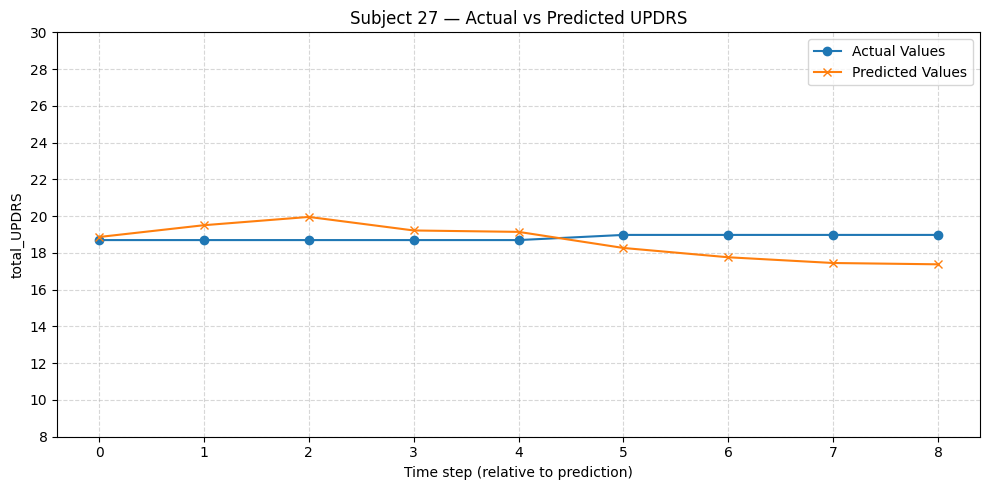


Subject 28 — MSE: 3.540
Actual vs Predicted:
  Actual: 26.618 | Predicted: 28.192
  Actual: 26.618 | Predicted: 28.156
  Actual: 26.618 | Predicted: 28.127
  Actual: 25.767 | Predicted: 28.136
  Actual: 25.767 | Predicted: 28.016
  Actual: 25.767 | Predicted: 27.868
  Actual: 25.767 | Predicted: 27.639
  Actual: 25.767 | Predicted: 27.493
  Actual: 25.767 | Predicted: 27.548


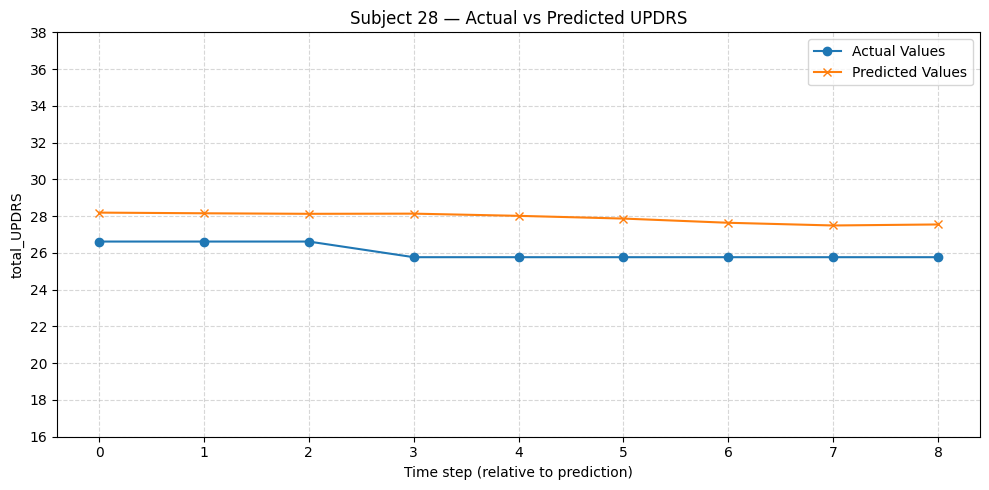


Subject 29 — MSE: 1.017
Actual vs Predicted:
  Actual: 32.707 | Predicted: 32.626
  Actual: 32.707 | Predicted: 32.606
  Actual: 32.707 | Predicted: 32.900
  Actual: 33.037 | Predicted: 32.788
  Actual: 33.037 | Predicted: 32.857
  Actual: 33.037 | Predicted: 32.827
  Actual: 33.038 | Predicted: 32.615
  Actual: 33.038 | Predicted: 32.370
  Actual: 33.038 | Predicted: 32.477
  Actual: 33.423 | Predicted: 32.014
  Actual: 33.423 | Predicted: 32.260
  Actual: 33.423 | Predicted: 31.994
  Actual: 33.423 | Predicted: 32.050
  Actual: 33.423 | Predicted: 32.028
  Actual: 33.423 | Predicted: 32.163
  Actual: 33.807 | Predicted: 32.398
  Actual: 33.807 | Predicted: 32.546
  Actual: 33.807 | Predicted: 32.438
  Actual: 33.807 | Predicted: 32.822
  Actual: 33.807 | Predicted: 32.867
  Actual: 33.807 | Predicted: 33.582
  Actual: 34.140 | Predicted: 33.753
  Actual: 34.140 | Predicted: 33.970
  Actual: 34.140 | Predicted: 33.905
  Actual: 34.140 | Predicted: 33.690
  Actual: 34.140 | Predicted:

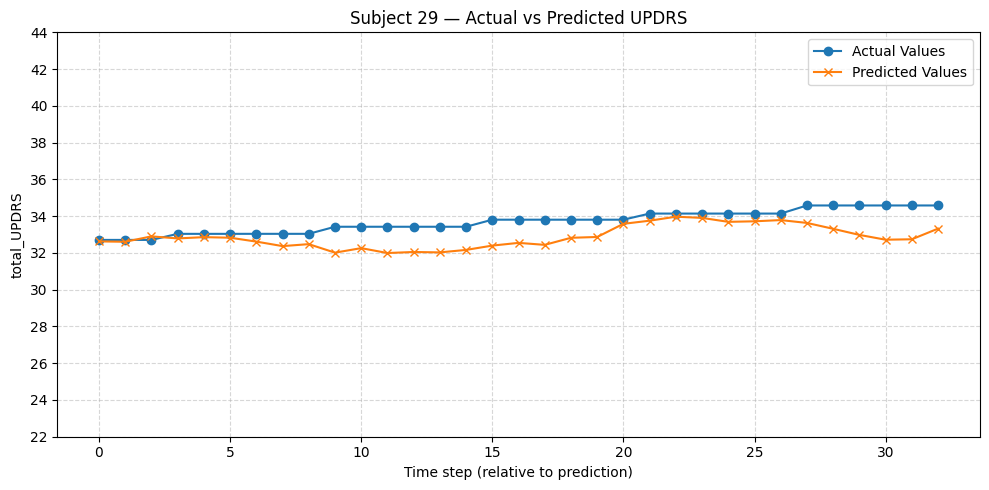


Subject 30 — MSE: 0.881
Actual vs Predicted:
  Actual: 30.221 | Predicted: 29.541
  Actual: 29.477 | Predicted: 29.478
  Actual: 29.477 | Predicted: 29.259
  Actual: 29.476 | Predicted: 28.752
  Actual: 29.476 | Predicted: 28.143
  Actual: 29.476 | Predicted: 27.903


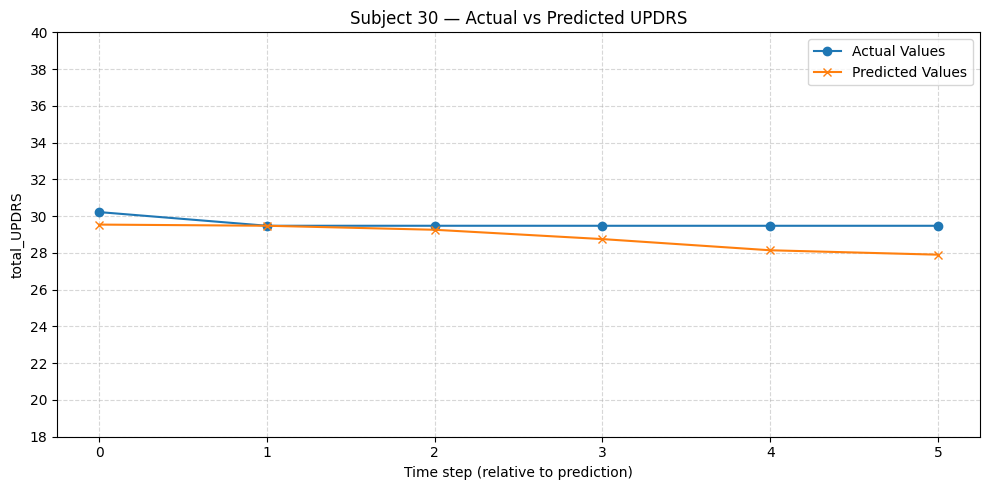


Subject 31 — MSE: 5.526
Actual vs Predicted:
  Actual: 22.392 | Predicted: 25.089
  Actual: 22.392 | Predicted: 24.892
  Actual: 22.392 | Predicted: 24.709
  Actual: 22.392 | Predicted: 24.552
  Actual: 22.392 | Predicted: 24.409


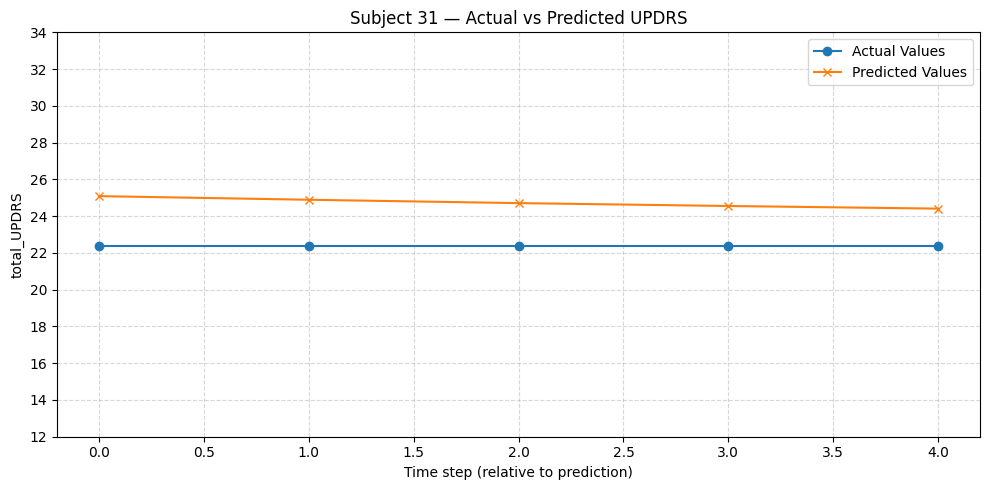

Subject 32 skipped due to insufficient data)

Subject 33 — MSE: 0.660
Actual vs Predicted:
  Actual: 32.000 | Predicted: 32.545
  Actual: 32.000 | Predicted: 32.526
  Actual: 32.000 | Predicted: 32.682
  Actual: 32.000 | Predicted: 32.706
  Actual: 32.000 | Predicted: 32.721
  Actual: 32.000 | Predicted: 32.788
  Actual: 32.000 | Predicted: 32.879
  Actual: 32.000 | Predicted: 32.958
  Actual: 32.000 | Predicted: 32.988
  Actual: 32.000 | Predicted: 33.122


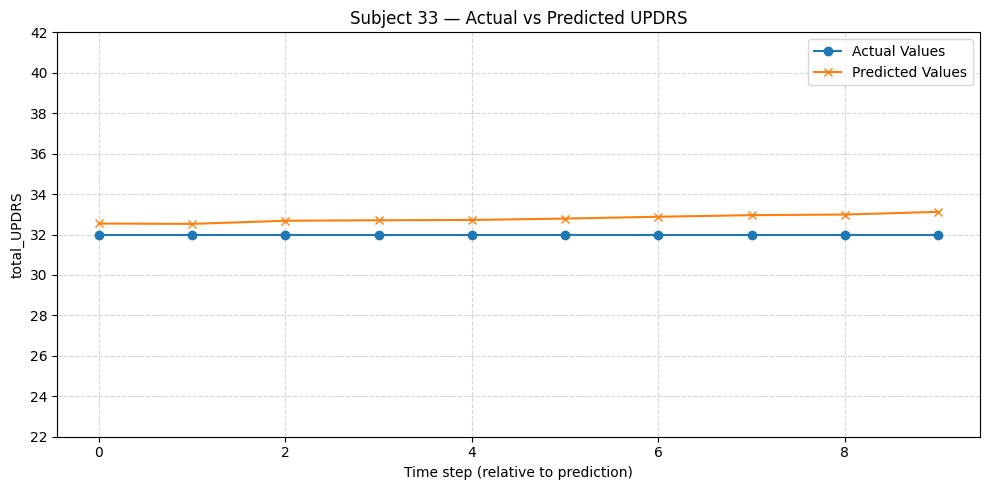


Subject 34 — MSE: 0.387
Actual vs Predicted:
  Actual: 33.273 | Predicted: 32.831
  Actual: 33.273 | Predicted: 32.987
  Actual: 33.662 | Predicted: 33.215
  Actual: 33.662 | Predicted: 33.850
  Actual: 33.662 | Predicted: 33.949
  Actual: 33.662 | Predicted: 34.240
  Actual: 33.662 | Predicted: 34.506
  Actual: 33.662 | Predicted: 34.855
  Actual: 34.044 | Predicted: 34.939
  Actual: 34.044 | Predicted: 34.877
  Actual: 34.044 | Predicted: 34.575
  Actual: 34.044 | Predicted: 34.450
  Actual: 34.044 | Predicted: 34.116
  Actual: 34.044 | Predicted: 34.011
  Actual: 34.424 | Predicted: 34.391
  Actual: 34.424 | Predicted: 34.167
  Actual: 34.424 | Predicted: 34.317
  Actual: 34.424 | Predicted: 34.312
  Actual: 34.424 | Predicted: 33.966
  Actual: 34.424 | Predicted: 33.832
  Actual: 34.817 | Predicted: 34.513
  Actual: 34.817 | Predicted: 34.085
  Actual: 34.817 | Predicted: 34.341
  Actual: 34.817 | Predicted: 34.779
  Actual: 34.817 | Predicted: 35.456
  Actual: 34.817 | Predicted:

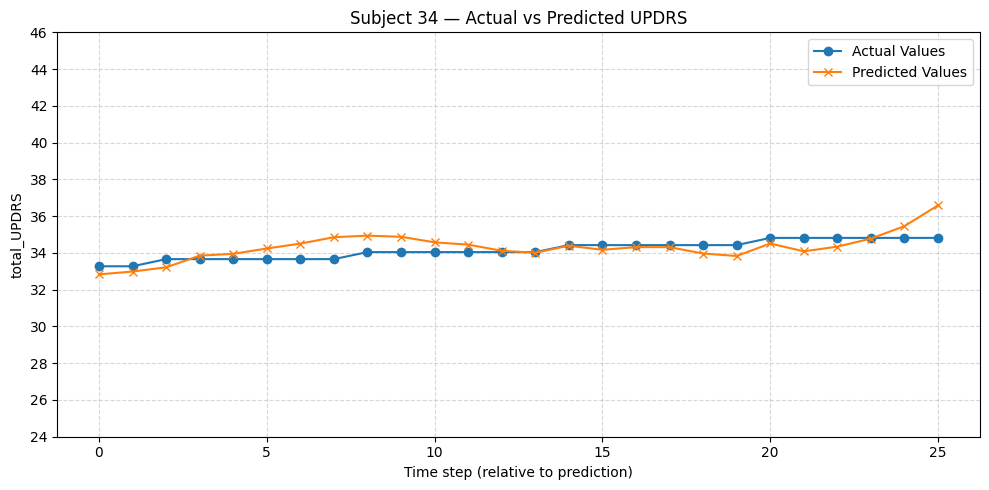


Subject 35 — MSE: 0.525
Actual vs Predicted:
  Actual: 53.802 | Predicted: 54.478
  Actual: 53.687 | Predicted: 54.571
  Actual: 53.687 | Predicted: 54.648
  Actual: 53.687 | Predicted: 54.689
  Actual: 53.687 | Predicted: 54.824
  Actual: 53.687 | Predicted: 54.865
  Actual: 53.572 | Predicted: 54.777
  Actual: 53.572 | Predicted: 54.745
  Actual: 53.572 | Predicted: 54.707
  Actual: 53.572 | Predicted: 54.625
  Actual: 53.572 | Predicted: 54.495
  Actual: 53.572 | Predicted: 54.236
  Actual: 53.340 | Predicted: 54.092
  Actual: 53.340 | Predicted: 53.842
  Actual: 53.340 | Predicted: 53.423
  Actual: 53.340 | Predicted: 53.039
  Actual: 53.340 | Predicted: 52.921
  Actual: 53.340 | Predicted: 52.640
  Actual: 53.224 | Predicted: 52.607
  Actual: 53.224 | Predicted: 52.727
  Actual: 53.224 | Predicted: 52.844
  Actual: 53.224 | Predicted: 53.008
  Actual: 53.224 | Predicted: 53.036
  Actual: 53.224 | Predicted: 52.860
  Actual: 53.109 | Predicted: 53.015
  Actual: 53.109 | Predicted:

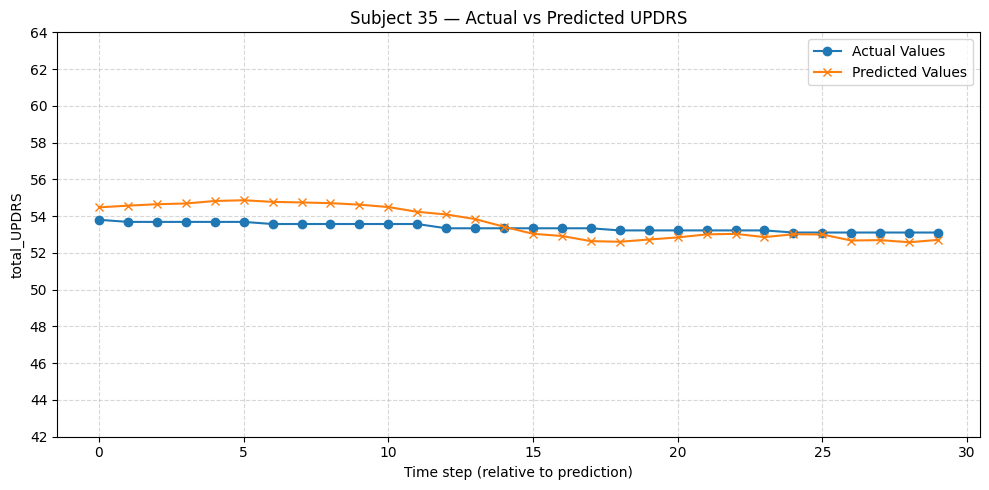


Subject 36 — MSE: 1.921
Actual vs Predicted:
  Actual: 32.000 | Predicted: 30.815
  Actual: 32.000 | Predicted: 30.662
  Actual: 32.000 | Predicted: 30.683
  Actual: 32.000 | Predicted: 30.577
  Actual: 32.000 | Predicted: 30.585
  Actual: 32.000 | Predicted: 30.559
  Actual: 32.000 | Predicted: 30.518
  Actual: 32.000 | Predicted: 30.614
  Actual: 32.000 | Predicted: 30.537


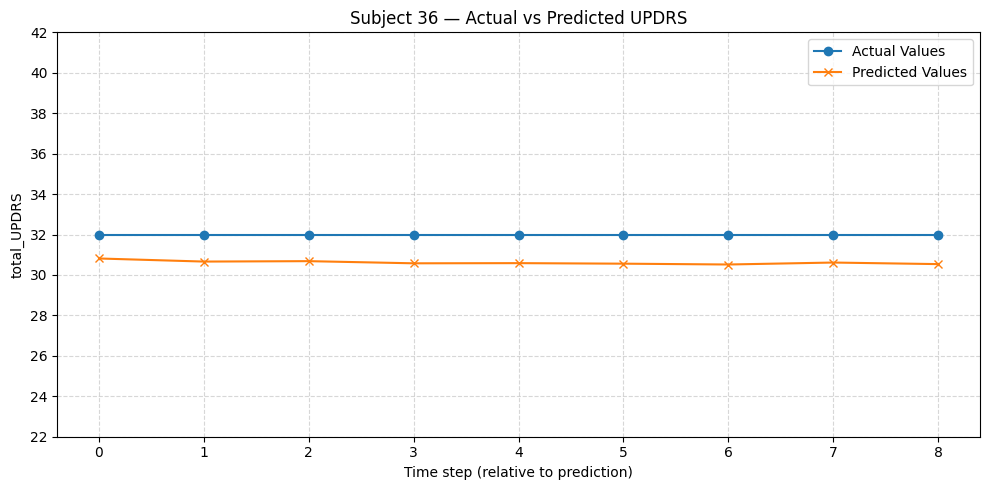


Subject 37 — MSE: 4.105
Actual vs Predicted:
  Actual: 48.530 | Predicted: 46.453
  Actual: 48.530 | Predicted: 46.318
  Actual: 48.530 | Predicted: 46.496
  Actual: 48.530 | Predicted: 46.621
  Actual: 48.530 | Predicted: 46.650


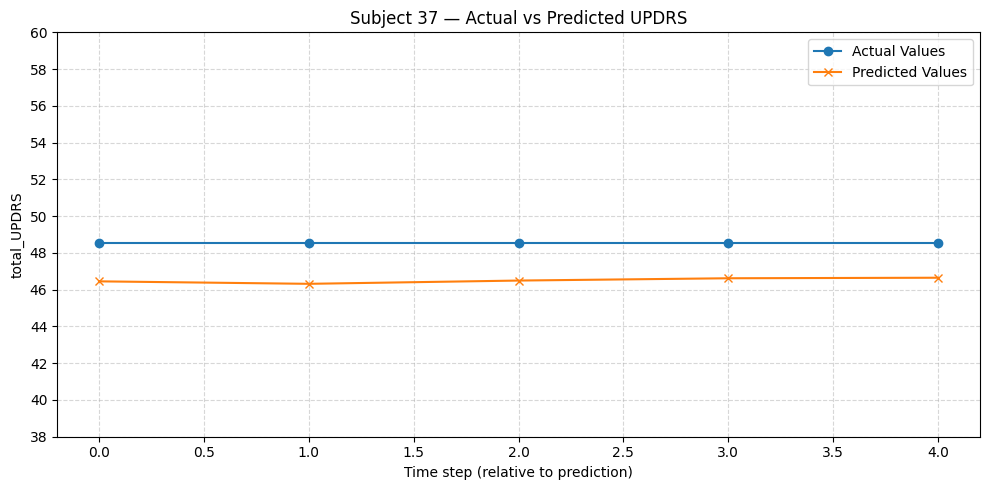


Subject 38 — MSE: 2.715
Actual vs Predicted:
  Actual: 26.647 | Predicted: 27.227
  Actual: 26.647 | Predicted: 27.099
  Actual: 26.437 | Predicted: 27.061
  Actual: 26.437 | Predicted: 27.168
  Actual: 26.437 | Predicted: 27.414
  Actual: 26.437 | Predicted: 27.426
  Actual: 26.437 | Predicted: 27.655
  Actual: 26.437 | Predicted: 28.167
  Actual: 26.218 | Predicted: 28.412
  Actual: 26.218 | Predicted: 28.909
  Actual: 26.218 | Predicted: 28.813
  Actual: 26.218 | Predicted: 28.508
  Actual: 26.218 | Predicted: 28.079
  Actual: 26.218 | Predicted: 27.844


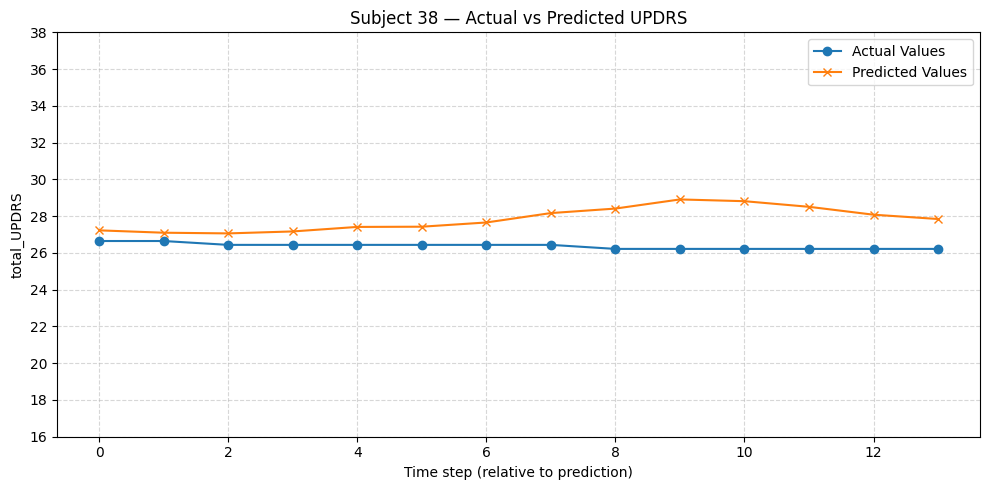


Subject 39 — MSE: 17.814
Actual vs Predicted:
  Actual: 44.027 | Predicted: 47.418
  Actual: 44.027 | Predicted: 48.098
  Actual: 44.298 | Predicted: 48.446
  Actual: 44.298 | Predicted: 48.550
  Actual: 44.298 | Predicted: 48.958
  Actual: 44.298 | Predicted: 48.879
  Actual: 44.298 | Predicted: 48.857
  Actual: 44.298 | Predicted: 48.255


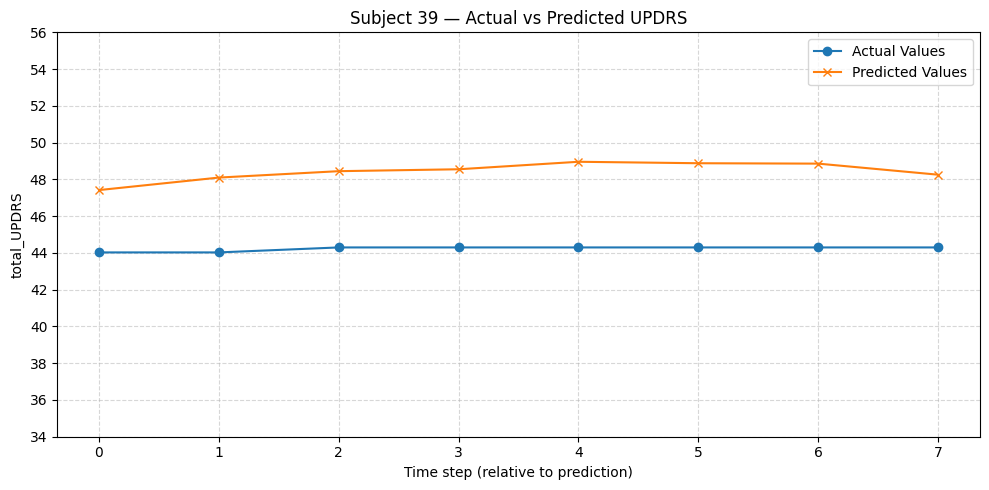


Subject 40 — MSE: 44.341
Actual vs Predicted:
  Actual: 22.810 | Predicted: 29.100
  Actual: 22.349 | Predicted: 29.040
  Actual: 22.349 | Predicted: 28.975
  Actual: 22.349 | Predicted: 28.908
  Actual: 22.349 | Predicted: 28.966
  Actual: 22.349 | Predicted: 29.179
  Actual: 22.349 | Predicted: 29.327


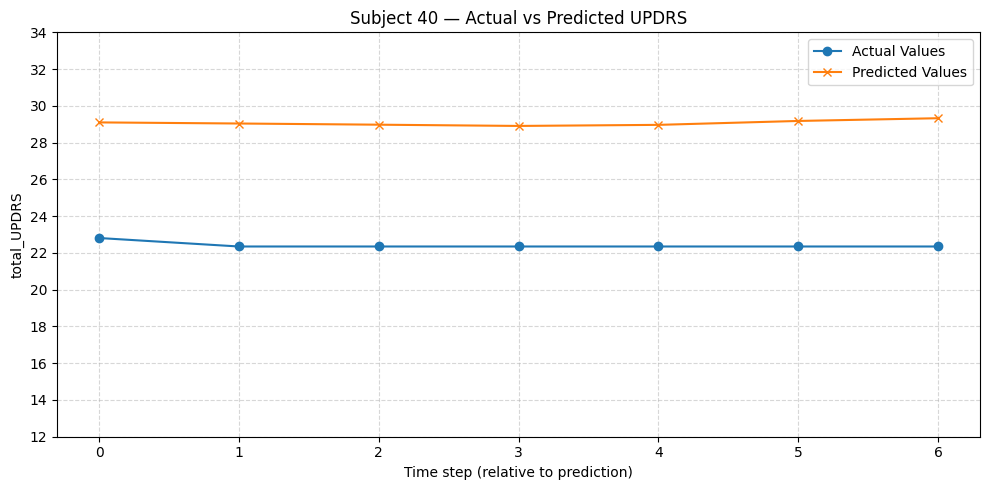


Subject 41 — MSE: 54.978
Actual vs Predicted:
  Actual: 43.980 | Predicted: 37.983
  Actual: 43.687 | Predicted: 37.617
  Actual: 43.687 | Predicted: 37.459
  Actual: 43.687 | Predicted: 37.444
  Actual: 43.687 | Predicted: 37.068
  Actual: 43.687 | Predicted: 36.770
  Actual: 43.687 | Predicted: 36.415
  Actual: 43.354 | Predicted: 36.451
  Actual: 43.354 | Predicted: 36.336
  Actual: 43.354 | Predicted: 35.931
  Actual: 43.354 | Predicted: 35.888
  Actual: 43.354 | Predicted: 35.869
  Actual: 43.354 | Predicted: 36.048
  Actual: 43.104 | Predicted: 35.989
  Actual: 43.104 | Predicted: 36.019
  Actual: 43.104 | Predicted: 35.712
  Actual: 43.104 | Predicted: 35.760
  Actual: 43.104 | Predicted: 35.900
  Actual: 42.810 | Predicted: 35.543
  Actual: 42.810 | Predicted: 35.220
  Actual: 42.810 | Predicted: 34.736
  Actual: 42.810 | Predicted: 34.517
  Actual: 42.810 | Predicted: 34.503
  Actual: 42.810 | Predicted: 34.528
  Actual: 42.515 | Predicted: 34.578
  Actual: 42.514 | Predicted

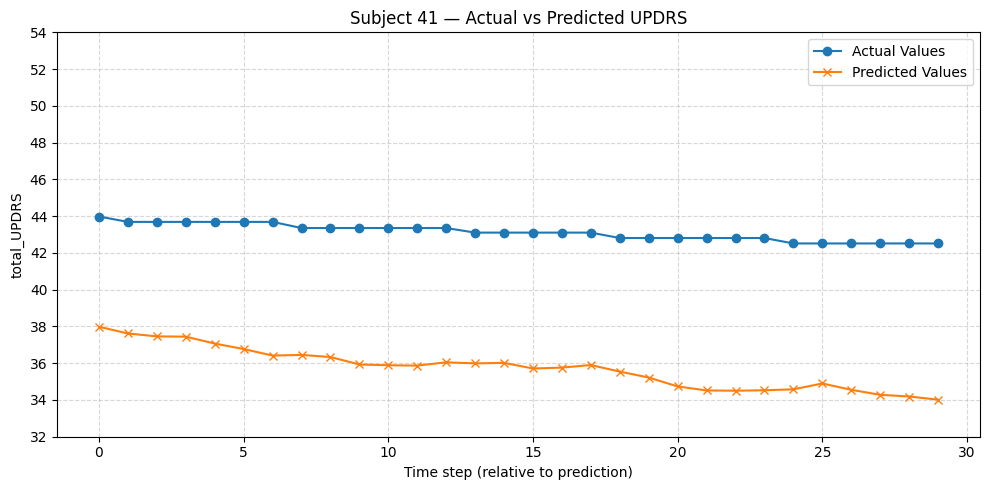


Subject 42 — MSE: 11.372
Actual vs Predicted:
  Actual: 32.495 | Predicted: 29.295
  Actual: 32.495 | Predicted: 29.340
  Actual: 32.495 | Predicted: 29.412
  Actual: 32.007 | Predicted: 29.340
  Actual: 32.007 | Predicted: 29.107
  Actual: 32.007 | Predicted: 28.891
  Actual: 32.007 | Predicted: 28.703
  Actual: 32.007 | Predicted: 28.563
  Actual: 32.007 | Predicted: 28.350
  Actual: 31.513 | Predicted: 28.194
  Actual: 31.513 | Predicted: 27.802
  Actual: 31.513 | Predicted: 27.973
  Actual: 31.513 | Predicted: 27.894
  Actual: 31.513 | Predicted: 27.809
  Actual: 31.513 | Predicted: 27.592


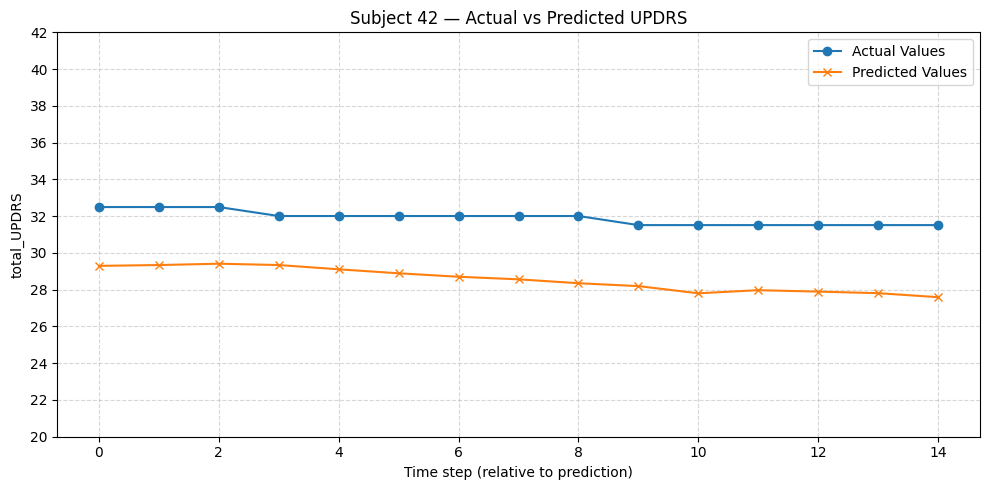

In [14]:
seq_length = 10

for subject_id, group in test_df.groupby('subject#'):
    X_subj = group[feature_cols].values
    y_true = group[target_col].values

    if len(X_subj) <= seq_length:
        print(f"Subject {subject_id} skipped due to insufficient data)")
        continue

    preds = []
    for i in range(len(X_subj) - seq_length):
        x_input = X_subj[i:i+seq_length]
        x_input = np.expand_dims(x_input, axis=0)
        y_pred_scaled = model.predict(x_input, verbose=0)
        y_pred = scaler_y.inverse_transform(y_pred_scaled)[0][0]
        preds.append(y_pred )

    actuals = y_true[seq_length:]

    mse = mean_squared_error(actuals, preds)
    print(f"\nSubject {subject_id} — MSE: {mse:.3f}")
    print("Actual vs Predicted:")
    for a, p in zip(actuals, preds):
        print(f"  Actual: {a:.3f} | Predicted: {p:.3f}")

    plt.figure(figsize=(10, 5))
    plt.plot(actuals, label="Actual Values", marker='o')
    plt.plot(preds, label="Predicted Values", marker='x')
    plt.title(f"Subject {subject_id} — Actual vs Predicted UPDRS")
    plt.xlabel("Time step (relative to prediction)")
    plt.ylabel("total_UPDRS")

    center = np.mean(actuals)
    y_min = math.floor((center - 10) / 2.0) * 2
    y_max = math.ceil((center + 10) / 2.0) * 2
    plt.ylim(y_min, y_max)
    plt.yticks(np.arange(y_min, y_max + 1, 2))

    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

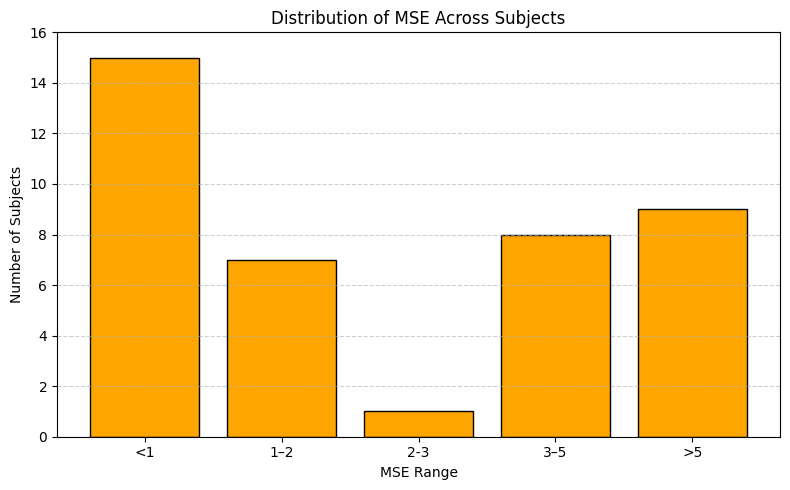

In [15]:
mse_list = []

for subject_id, group in test_df.groupby('subject#'):
    X_subj = group[feature_cols].values
    y_true = group[target_col].values

    if len(X_subj) <= seq_length:
        continue

    preds = []
    for i in range(len(X_subj) - seq_length):
        x_input = X_subj[i:i+seq_length]
        x_input = np.expand_dims(x_input, axis=0)
        y_pred_scaled = model.predict(x_input, verbose=0)
        y_pred = scaler_y.inverse_transform(y_pred_scaled)[0][0]
        preds.append(y_pred)

    actuals = y_true[seq_length:]
    mse = mean_squared_error(actuals, preds)
    mse_list.append(mse)

bins = ['<1', '1–2', '2-3', '3–5', '>5']
counts = [0, 0, 0, 0, 0]

for mse in mse_list:
    if mse < 1:
        counts[0] += 1
    elif mse < 2:
        counts[1] += 1
    elif mse < 3:
        counts[2] += 1
    elif mse < 5:
        counts[3] += 1
    else:
        counts[4] += 1

plt.figure(figsize=(8, 5))
plt.bar(bins, counts, color='orange', edgecolor='black')
plt.title("Distribution of MSE Across Subjects")
plt.xlabel("MSE Range")
plt.ylabel("Number of Subjects")
plt.grid(axis='y', linestyle='--', alpha=0.6)

max_y = max(counts)
plt.yticks(range(0, max_y + 3, 2))

plt.tight_layout()
plt.show()

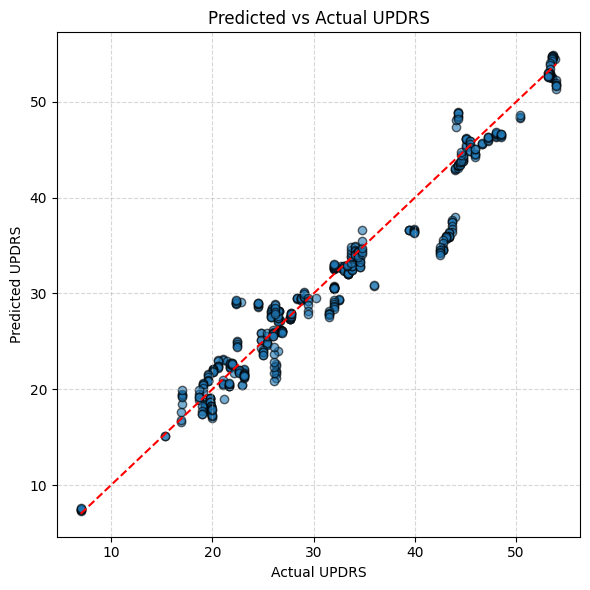

In [16]:
all_preds = []
all_actuals = []

for subject_id, group in test_df.groupby('subject#'):
    X_subj = group[feature_cols].values
    y_true = group[target_col].values

    if len(X_subj) <= seq_length:
        continue

    for i in range(len(X_subj) - seq_length):
        x_input = X_subj[i:i+seq_length]
        x_input = np.expand_dims(x_input, axis=0)
        y_pred_scaled = model.predict(x_input, verbose=0)
        y_pred = scaler_y.inverse_transform(y_pred_scaled)[0][0]

        all_preds.append(y_pred)
        all_actuals.append(y_true[i + seq_length])

plt.figure(figsize=(6, 6))
plt.scatter(all_actuals, all_preds, alpha=0.6, edgecolor='k')
plt.plot([min(all_actuals), max(all_actuals)], [min(all_actuals), max(all_actuals)], 'r--')
plt.title("Predicted vs Actual UPDRS")
plt.xlabel("Actual UPDRS")
plt.ylabel("Predicted UPDRS")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


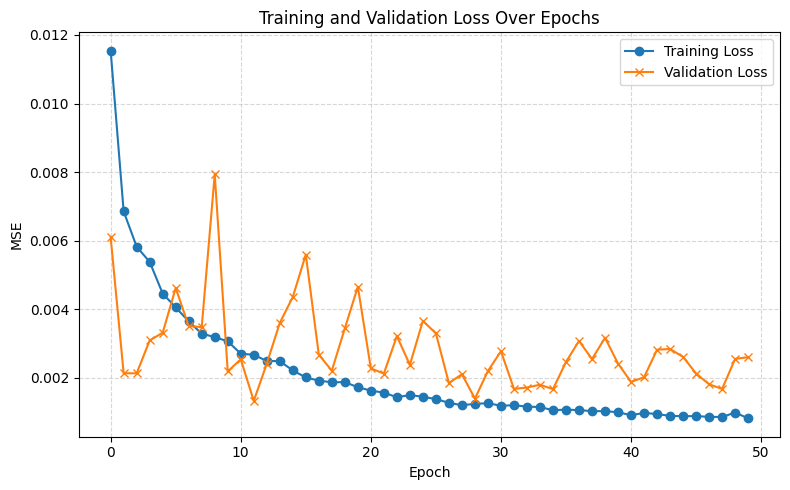

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [18]:
mae_list = []

for subject_id, group in test_df.groupby('subject#'):
    X_subj = group[feature_cols].values
    y_true = group[target_col].values

    if len(X_subj) <= seq_length:
        continue

    preds = []
    for i in range(len(X_subj) - seq_length):
        x_input = X_subj[i:i+seq_length]
        x_input = np.expand_dims(x_input, axis=0)
        y_pred_scaled = model.predict(x_input, verbose=0)
        y_pred = scaler_y.inverse_transform(y_pred_scaled)[0][0]
        preds.append(y_pred)

    actuals = y_true[seq_length:]
    mae = mean_absolute_error(actuals, preds)
    mae_list.append(mae)

print("MAE per subject:")
for i, val in enumerate(mae_list, start=1):
    print(f"Subject {i}: {val:.4f}")


MAE per subject:
Subject 1: 1.1839
Subject 2: 0.8595
Subject 3: 3.2291
Subject 4: 0.1870
Subject 5: 0.8578
Subject 6: 0.7869
Subject 7: 1.7282
Subject 8: 0.8335
Subject 9: 0.7366
Subject 10: 0.7901
Subject 11: 1.0065
Subject 12: 5.0796
Subject 13: 0.5750
Subject 14: 1.7296
Subject 15: 1.1222
Subject 16: 3.7097
Subject 17: 0.4510
Subject 18: 0.2253
Subject 19: 1.6715
Subject 20: 1.9864
Subject 21: 0.1948
Subject 22: 3.7943
Subject 23: 1.9722
Subject 24: 1.7683
Subject 25: 1.2342
Subject 26: 0.9178
Subject 27: 1.8577
Subject 28: 0.8390
Subject 29: 0.7548
Subject 30: 2.3383
Subject 31: 0.7915
Subject 32: 0.4829
Subject 33: 0.6329
Subject 34: 1.3834
Subject 35: 2.0225
Subject 36: 1.4684
Subject 37: 4.2026
Subject 38: 6.6559
Subject 39: 7.3826
Subject 40: 3.3560
